In [94]:
# Importing data set
import numpy as np
import os
os.chdir('D:\Pandas')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("income.csv",na_values=["  ?"])





In [43]:
#creating deep copy of orignal data set

data_set.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [45]:
#getting to know about our data set
#checking variables data types
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [26]:
#check for missing  values
data.isnull().sum()


#no missing values!

JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [48]:
#descriptive statistics of all numerical variables
data_set.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [49]:
#descriptive statistica for categorical variables
data_set.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [62]:
#frequency of each category
data_set['JobType'].value_counts()
data_set['occupation'].value_counts()


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [78]:
#checking unique values 

#converting ' ?' as nan value 
data_set=pd.read_csv("income.csv",na_values=[' ?'])
missing=data[data_set.isnull().any(axis=1)]
missing
#drop missing value for further analysis
data2=data_set.dropna(axis=0)
data2


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [80]:
#relationship between numerical varibales using correlation
correl=data2.corr()
correl

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


(array([ 9782.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20380.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

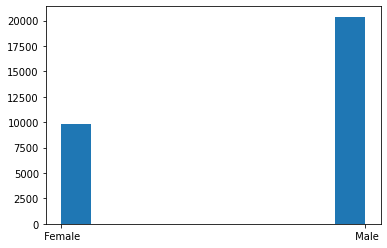

In [88]:
#relationship between categorical variables
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
gender
plt.hist(data2["gender"])

In [91]:
#gender vs salary 
pd.crosstab(index=data2['gender'],columns=data2['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


C:\phython 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

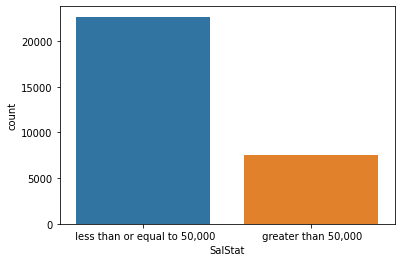

In [100]:
#proportion of salary status
salst=sns.countplot(data2['SalStat'])
data2['SalStat'].value_counts()

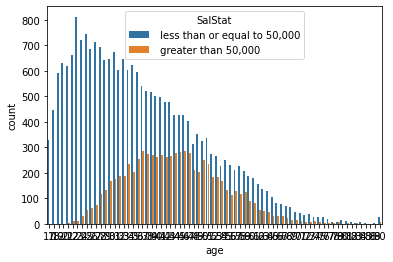

In [113]:
#frequency distribution of age variable
agee=sns.countplot(x='age',data=data2,hue='SalStat')

C:\phython 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


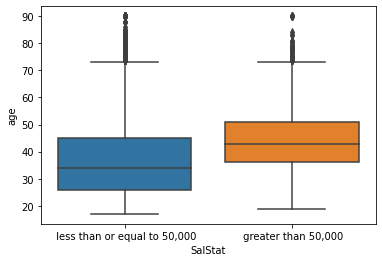

In [114]:
#box plot for age and salary distribution
ager=sns.boxplot('SalStat','age',data=data2)

<AxesSubplot:xlabel='JobType', ylabel='count'>

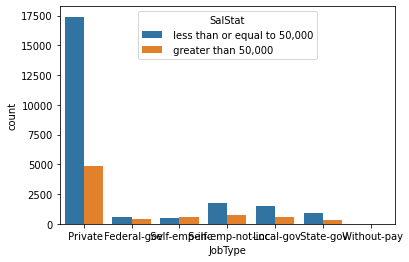

In [115]:
#bar chart of jobtitle vs salstatus
sns.countplot(x='JobType',data=data2,hue='SalStat')


In [123]:
#crosstab for jobtype vs salsatus
saljob=pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],normalize='index')
saljob

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000


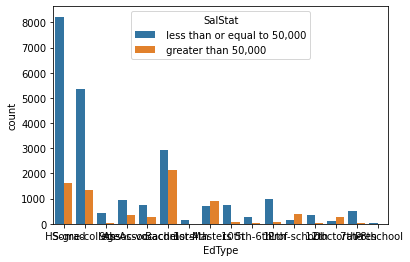

In [127]:
#Education vs salary status
evss=sns.countplot(x='EdType',data=data2,hue='SalStat')

In [129]:
evss1=pd.crosstab(index=data2['EdType'],columns=data2['SalStat'],normalize='index')
evss1

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


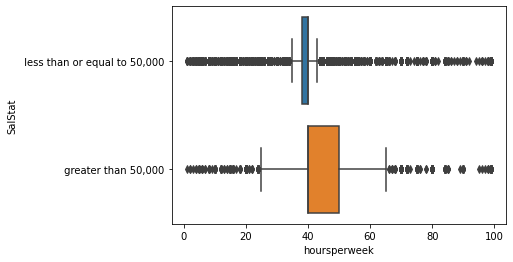

In [137]:
#hours per week vs salary stats
hpw=sns.boxplot(x=data2['hoursperweek'],y=data2['SalStat'])